## Frequenza dei volumi adottati per editore
I file di questa presentazione sono disponibili su https://github.com/claudiotubertini/almalibri

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from IPython.display import Image
from IPython.display import HTML, display
import matplotlib.pyplot as plt
%matplotlib inline

Carichiamo il file con le adozioni della Area 14, SSD SPS/06 "Storia delle relazioni internazionali"

In [3]:
ad = pd.read_csv('A14_SPS-06.csv', sep=";", dtype={'isbn': str})

In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1463 entries, 0 to 1462
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   uni_cod                1463 non-null   object 
 1   a_a                    1463 non-null   int64  
 2   laurea_nome            1463 non-null   object 
 3   laurea_tipo            1463 non-null   object 
 4   laurea_classe_cod      1463 non-null   object 
 5   curr_nome              1463 non-null   object 
 6   materia_nome           1463 non-null   object 
 7   materia_ssd_cod        1463 non-null   object 
 8   materia_cfu            1454 non-null   float64
 9   curr_materia_anno      1463 non-null   int64  
 10  curr_materia_periodo   1418 non-null   object 
 11  modulo_nome            230 non-null    object 
 12  sub_modulo_gruppo      14 non-null     object 
 13  sub_modulo_nome        136 non-null    object 
 14  modulo_cfu             250 non-null    float64
 15  modu

Cerchiamo quali sono i testi adottati nei diversi corsi, non possiamo che leggerli in una tabella.

In [5]:
ad2 = ad[['laurea_nome', 'materia_nome', 'editore','isbn','titolo','anno_pub']]\
        .groupby(['laurea_nome', 'materia_nome','editore','isbn','titolo'])['anno_pub'].count()\
        .reset_index().sort_values('laurea_nome')

In [6]:
def display_table(data):
    html = "<table><tr><th>Laurea</th><th>&nbsp;</th><th>Insegnamento</th><th>&nbsp;</th><th>Editore</th><th>&nbsp;</th><th>isbn</th><th>&nbsp;</th><th>Titolo</th><th>&nbsp;</th><th>Numero adozioni</th></tr>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td>%s<td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))
display_table(ad2.values)

Laurea,,Insegnamento,,Editore,,isbn,,Titolo,,Numero adozioni


Guardiamo ora alla distribuzione dei titoli adottati per editore. 

In [19]:
ad3 = ad[['isbn','editore','autori','curatori','titolo','anno_pub','lingua','pagg']]\
        .groupby(['isbn','editore','autori','titolo','anno_pub'])['isbn'].count()\
        .reset_index(name='numero adozioni').sort_values(['editore','numero adozioni'])

In [20]:
def display_table(data):
    html = "<table><tr><th>ISBN</th><th>&nbsp;</th><th>Editore</th><th>&nbsp;</th><th>Autori</th><th>&nbsp;</th><th>Titolo</th><th>&nbsp;</th><th>Anno</th><th>&nbsp;</th><th>Numero adozioni</th></tr>"
    for row in data:
        html += "<tr>"
        for field in row:
            html += "<td>%s<td>"%(field)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))
display_table(ad3.values)

ISBN,,Editore,,Autori,,Titolo,,Anno,,Numero adozioni


Ordiniamo i dati per editore e per numero di adozioni

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

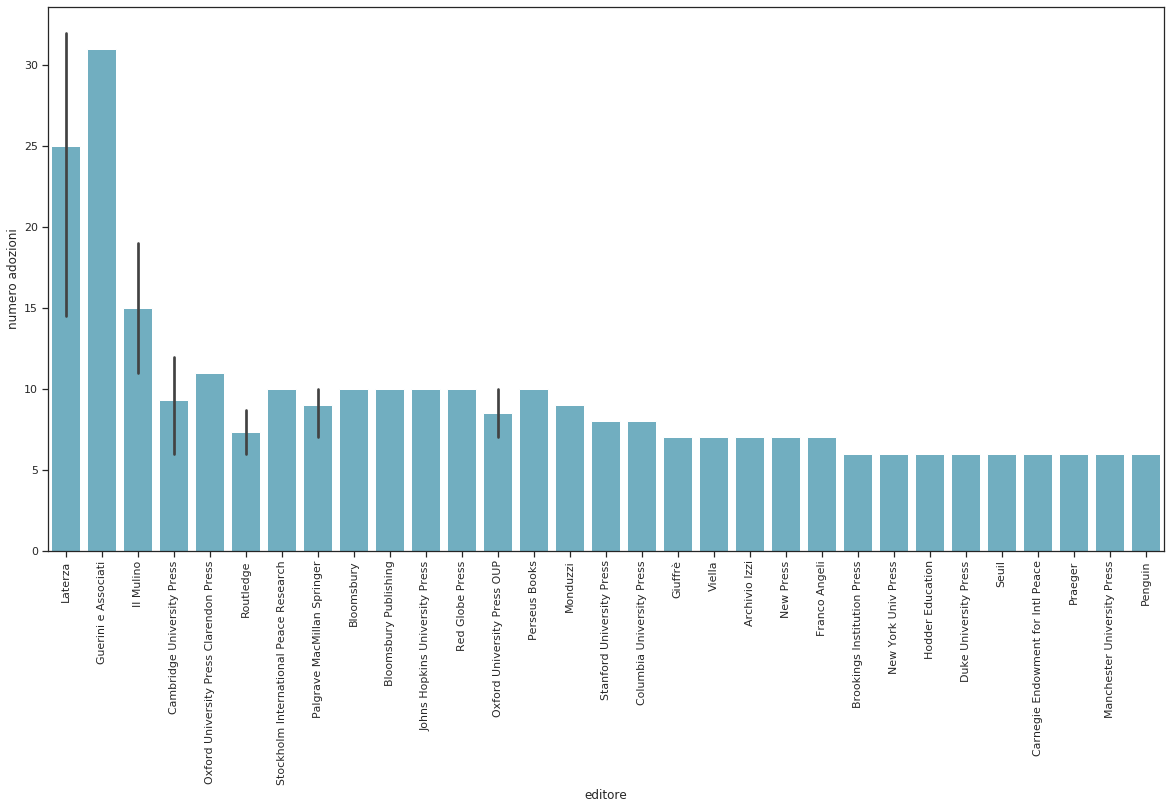

In [25]:
ad3 = ad[['isbn','editore','autori','curatori','titolo','anno_pub','lingua','pagg']]\
        .groupby(['isbn','editore','autori','titolo','anno_pub'])['isbn'].count()\
        .reset_index(name='numero adozioni').sort_values(['numero adozioni'],ascending=False)

plt.figure(figsize=(20,10))
sns.set_theme(style="ticks", color_codes=True)
sns.barplot(x="editore", y='numero adozioni', data=ad3.head(50), color="c")
plt.xticks(rotation=90)

Osserviamo incidentalmente che abbiamo rappresentato il numero di adozioni di ISBN per editore, quindi ci sono editori che hanno isbn con numeri di adottati diversi, qui rappresentati con l'intervallo di "confidenza".